# Data Acquisition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os


from math import sqrt

from scipy import stats
from pydataset import data

## Iris Data

In [14]:
df_iris = data('iris')

### print the first 3 rows

In [15]:
df_iris.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa


### print the number of rows and columns (shape)

In [16]:
df_iris.shape

(150, 5)

### print the column names

In [17]:
df_iris.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

### print the data type of each column

In [18]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


### print the summary statistics for each of the numeric variables

In [19]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
Sepal.Length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
Sepal.Width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
Petal.Length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
Petal.Width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


## Google data

In [4]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'    

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df_google = pd.read_csv(csv_export_url)

### print the first 3 rows

In [5]:
df_google.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### print the number of rows and columns

In [6]:
df_google.shape

(891, 12)

### print the column names

In [20]:
list(df_google.columns)

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked']

### print the data type of each column

In [8]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### print the summary statistics for each of the numeric variables

In [9]:
df_google.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### print the unique values for each of your categorical variables

In [23]:
df_google.Name.nunique()

891

In [21]:
df_google.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [24]:
df_google.Ticket.value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [25]:
df_google.Cabin.value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
C22 C26            3
F33                3
F2                 3
E101               3
D                  3
C78                2
C93                2
E8                 2
D36                2
B77                2
C123               2
E121               2
E44                2
D35                2
C125               2
E67                2
B35                2
B18                2
E24                2
B49                2
C65                2
B20                2
B5                 2
B57 B59 B63 B66    2
C126               2
B51 B53 B55        2
F4                 2
C124               2
F G73              2
B58 B60            2
C52                2
D33                2
C68                2
D20                2
D26                2
B28                2
C83                2
E25                2
D17                2
B22                2
C92                2
C2                 2
E33                2
C70                1
E58          

In [26]:
df_google.Cabin.nunique()

147

In [28]:
df_google.Embarked.value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

#### notes from class exercises

In [30]:
# I could get a count of unique values for each variable with an object data type.

for col in df_google.columns:
#     print(col)
    if df_google[col].dtypes == 'object':
        print(f'{col} has {df_google[col].nunique()} unique values.')

Name has 891 unique values.
Sex has 2 unique values.
Ticket has 681 unique values.
Cabin has 147 unique values.
Embarked has 3 unique values.


## Excel

In [10]:
df_excel = pd.read_excel('train.xlsx')

### assign the first 100 rows to a new dataframe, df_excel_sample

In [11]:
df_excel_sample = df_excel.head(100)
df_excel_sample

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.00,1.0,0.0,A/5 21171,7.2500,NaN,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.00,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.00,0.0,0.0,STON/O2. 3101282,7.9250,NaN,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1.0,0.0,113803.0,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.00,0.0,0.0,373450.0,8.0500,NaN,S
5,6.0,0.0,3.0,"Moran, Mr. James",male,NaN,0.0,0.0,330877.0,8.4583,NaN,Q
6,7.0,0.0,1.0,"McCarthy, Mr. Timothy J",male,54.00,0.0,0.0,17463.0,51.8625,E46,S
7,8.0,0.0,3.0,"Palsson, Master. Gosta Leonard",male,2.00,3.0,1.0,349909.0,21.0750,NaN,S
8,9.0,1.0,3.0,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0.0,2.0,347742.0,11.1333,NaN,S
9,10.0,1.0,2.0,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1.0,0.0,237736.0,30.0708,NaN,C


### print the number of rows of your original dataframe

In [12]:
df_excel.index.size

891

### print the first 5 column names

In [34]:
df_excel.columns[:5]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex'], dtype='object')

### print the column names that have a data type of object

In [31]:
list(df_excel.select_dtypes(include='object').columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

### compute the range for each of the numeric variables.

In [42]:
number_columns = df_excel.select_dtypes(include=[np.number])

number_columns.max()-number_columns.min()

PassengerId    890.0000
Survived         1.0000
Pclass           2.0000
Age             79.5800
SibSp            8.0000
Parch            6.0000
Fare           512.3292
dtype: float64

#### notes from inclass exercies

In [32]:
# The two columns I want to know the range on are 'Age' and 'Fare'
# I can select just the true numeric variables to declutter my results.

titanic_stats = df_excel[['Age', 'Fare']].describe().T
titanic_stats

,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [33]:
titanic_stats['range'] = titanic_stats['max'] - titanic_stats['min']
titanic_stats

,count,mean,std,min,25%,50%,75%,max,range
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000,79.5800
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292,512.3292


# Data Preparation

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# filter out warnings
import warnings
warnings.filterwarnings('ignore')

## Iris

In [36]:
iris_df = acquire.get_iris_data()
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [37]:
iris_df.drop(columns=['species_id', 'measurement_id'], inplace=True)

In [38]:
iris_df.rename(columns={'species_name':'species'}, inplace=True)
iris_df.head()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.1,3.5,1.4,0.2
1,setosa,4.9,3.0,1.4,0.2
2,setosa,4.7,3.2,1.3,0.2
3,setosa,4.6,3.1,1.5,0.2
4,setosa,5.0,3.6,1.4,0.2


In [39]:
dummy_df = pd.get_dummies(iris_df['species'], dummy_na=False, drop_first=True)
dummy_df.head()

,versicolor,virginica
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [40]:
iris_df = pd.concat([iris_df, dummy_df], axis=1)
iris_df.head(1)

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0


In [37]:
def prep_iris(df):
    df.drop(columns=['species_id', 'measurement_id'], inplace=True)
    df.rename(columns={'species_name':'species'}, inplace=True)
    dummy_df = pd.get_dummies(df['species'], dummy_na=False, drop_first=True)
    df = pd.concat([df, dummy_df], axis=1)
    
    return df
    

In [38]:
prep_iris(acquire.get_iris_data()).head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


## Titanic

In [43]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [44]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   age           714 non-null    float64
 5   sibsp         891 non-null    int64  
 6   parch         891 non-null    int64  
 7   fare          891 non-null    float64
 8   embarked      889 non-null    object 
 9   class         891 non-null    object 
 10  deck          203 non-null    object 
 11  embark_town   889 non-null    object 
 12  alone         891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [45]:
# Looking at relationship between embarked and embark_town
pd.crosstab(titanic_df.embarked, titanic_df.embark_town)

embark_town,Cherbourg,Queenstown,Southampton
embarked,,,
C,168,0,0
Q,0,77,0
S,0,0,644


In [46]:
# Detailed look at the relationship between 
pd.crosstab(titanic_df['class'], titanic_df.pclass) 

pclass,1,2,3
class,,,
First,216,0,0
Second,0,184,0
Third,0,0,491


^^^***Data diagonally so that means they respresent the same thing***

In [47]:
titanic_df.describe().T

,count,mean,std,min,25%,50%,75%,max
passenger_id,891.0,445.000000,257.353842,0.00,222.5000,445.0000,667.5,890.0000
survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
sibsp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
alone,891.0,0.602694,0.489615,0.00,0.0000,1.0000,1.0,1.0000


In [48]:
# Creating a list of our numeric columns
numcols = [col for col in titanic_df.columns if titanic_df[col].dtype != 'O']
numcols

['passenger_id',
 'survived',
 'pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'alone']

In [49]:
obj_cols = titanic_df.columns[[titanic_df[col].dtype == 'O' for col in titanic_df.columns]]
for col in obj_cols:
    print(titanic_df[col].value_counts())
    print(titanic_df[col].value_counts(normalize=True, dropna=False))
    print('----------------------')

male      577
female    314
Name: sex, dtype: int64
male      0.647587
female    0.352413
Name: sex, dtype: float64
----------------------
S    644
C    168
Q     77
Name: embarked, dtype: int64
S      0.722783
C      0.188552
Q      0.086420
NaN    0.002245
Name: embarked, dtype: float64
----------------------
Third     491
First     216
Second    184
Name: class, dtype: int64
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64
----------------------
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64
NaN    0.772166
C      0.066218
B      0.052750
D      0.037037
E      0.035915
A      0.016835
F      0.014590
G      0.004489
Name: deck, dtype: float64
----------------------
Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64
Southampton    0.722783
Cherbourg      0.188552
Queenstown     0.086420
NaN            0.002245
Name: embark_town, dtype: float64
----------------------


In [50]:
titanic_df.drop(columns=['embarked', 'class', 'deck', 'age'], inplace=True)

In [51]:
titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')



In [52]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  891 non-null    int64  
 1   survived      891 non-null    int64  
 2   pclass        891 non-null    int64  
 3   sex           891 non-null    object 
 4   sibsp         891 non-null    int64  
 5   parch         891 non-null    int64  
 6   fare          891 non-null    float64
 7   embark_town   891 non-null    object 
 8   alone         891 non-null    int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 62.8+ KB


In [25]:
dummy_df = pd.get_dummies(titanic_df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,sex_male,embark_town_Queenstown,embark_town_Southampton
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [26]:
titanic_df = pd.concat([titanic_df, dummy_df], axis=1)
titanic_df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1


In [27]:
def prep_titanic():
    df = acquire.get_titanic_data()
    df.drop(columns=['embarked', 'class', 'deck', 'age'], inplace=True)
    df['embark_town'] = df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(df[['sex','embark_town']], dummy_na=False, drop_first=[True, True])
    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [28]:
prep_titanic()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,0,2,male,0,0,13.0000,Southampton,1,1,0,1
887,887,1,1,female,0,0,30.0000,Southampton,1,0,0,1
888,888,0,3,female,1,2,23.4500,Southampton,0,0,0,1
889,889,1,1,male,0,0,30.0000,Cherbourg,1,1,0,0


## Telco

In [41]:
telco_df = acquire.get_telco_data()
telco_df.head().T

,0,1,2,3,4
payment_type_id,2,2,1,1,2
internet_service_type_id,1,1,2,2,2
contract_type_id,2,1,1,1,1
customer_id,0002-ORFBO,0003-MKNFE,0004-TLHLJ,0011-IGKFF,0013-EXCHZ
gender,Female,Male,Male,Male,Female
senior_citizen,0,0,0,1,1
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,No,No
tenure,9,9,4,13,3
phone_service,Yes,Yes,Yes,Yes,Yes


In [14]:
telco_df.shape

(7043, 24)

In [15]:
telco_df.drop_duplicates(inplace=True)

In [16]:
telco_df.shape

(7043, 24)

In [17]:
drop_columns = ['payment_type_id', \
                'internet_service_type_id','contract_type_id', \
                'customer_id']

In [18]:
telco_df.drop(columns=drop_columns, inplace=True)

In [19]:
telco_df = telco_df[telco_df.total_charges!=' ']

In [20]:
telco_df.shape

(7032, 20)

In [21]:
telco_df.total_charges = telco_df.total_charges.astype(float)

In [22]:
telco_df.shape

(7032, 20)

In [23]:
# Creating a list of our categorical columns
catcol = [col for col in telco_df.columns if telco_df[col].dtype == 'O']

In [24]:
catcol

['gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [49]:
dummy_df = pd.get_dummies(telco_df[catcol], dummy_na=False, drop_first=[True, True])
dummy_df.head()

,gender_Male,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,1,1,1,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
3,1,1,0,1,0,0,0,0,0,1,...,1,1,1,0,0,1,0,0,1,0
4,0,1,0,1,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1


In [51]:
telco_df = pd.concat([telco_df, dummy_df], axis=1)

In [52]:
telco_df.shape

(7032, 47)

In [53]:
def prep_telco(df):
    df.drop_duplicates(inplace=True)
    df.drop(columns=['customer_id','payment_type_id', 'internet_service_type_id','contract_type_id'], inplace=True)
    df = df[df.total_charges!=' ']
    df.total_charges = telco_df.total_charges.astype(float)
    
    # Creating a list of our categorical columns
    catcol = [col for col in df.columns if df[col].dtype == 'O']
    dummy_df = pd.get_dummies(df[catcol], dummy_na=False, drop_first=[True, True])

    df = pd.concat([df, dummy_df], axis=1)
    
    return df

In [54]:
prep_telco(acquire.get_telco_data())

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,...,0,1,0,1,0,0,0,0,0,1
1,Male,0,No,No,9,Yes,Yes,No,No,No,...,1,0,0,0,0,0,0,0,0,1
2,Male,0,No,No,4,Yes,No,No,No,Yes,...,0,1,1,0,0,1,0,0,1,0
3,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,...,1,1,1,0,0,1,0,0,1,0
4,Female,1,Yes,No,3,Yes,No,No,No,No,...,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Female,0,No,No,13,Yes,No,Yes,No,No,...,0,0,0,1,0,0,0,0,0,1
7039,Male,0,Yes,No,22,Yes,Yes,No,No,No,...,1,1,1,0,0,1,0,0,1,0
7040,Male,0,No,No,2,Yes,No,No,Yes,No,...,0,1,0,0,0,0,0,0,0,1
7041,Male,0,Yes,Yes,67,Yes,No,Yes,No,Yes,...,1,0,0,0,1,0,0,0,0,1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire
import prepare

### Split your data

1. Write a function to split your data into `train`, `validate`, and `test` datasets. Add this function to `prepare.py`.

In [25]:
telco_clean = prepare.prep_telco(acquire.get_telco_data())

/Users/fostermark/codeup-data-science/classification-exercises/prepare.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_charges = df.total_charges.astype(float)


In [28]:
train, test = prepare.train_test_split(telco_clean,
                               train_size = 0.8,
                               stratify = telco_clean.churn_Yes,
                               random_state=1234)

In [29]:
train.shape

(5625, 47)

In [30]:
test.shape

(1407, 47)

In [32]:
train, validate = prepare.train_test_split(train,
                               train_size = 0.7,
                               stratify = train.churn_Yes,
                               random_state=1234)

In [33]:
train.shape

(3937, 47)

In [34]:
test.shape

(1407, 47)

In [35]:
validate.shape

(1688, 47)

In [36]:
def train_validate_test_split(df, target):
    
    train, test = train_test_split(df,
                               train_size = 0.8,
                               stratify = df[target],
                               random_state=1234)
    train, validate = train_test_split(train,
                               train_size = 0.7,
                               stratify = train[target],
                               random_state=1234)
    
    return train, validate, test

2. Run the function in your notebook on the Iris dataset, returning 3 datasets: `train_iris`, `validate_iris`, and `test_iris`.

In [4]:
iris_clean = prepare.prep_iris(acquire.get_iris_data())

In [5]:
train_iris, validate_iris, test_iris = prepare.train_validate_test_split(iris_clean, 
                                                                 'species')

In [6]:
print(f'Cleaned df: {iris_clean.shape}')
print()
print(f'Train: {train_iris.shape}')
print(f'Validate: {validate_iris.shape}')
print(f'Test: {test_iris.shape}')

Cleaned df: (150, 7)

Train: (84, 7)
Validate: (36, 7)
Test: (30, 7)


3. Run the function on the Titanic dataset, returning 3 datasets: `train_titanic`, `validate_titanic`, and `test_titanic`.

In [7]:
titanic_clean = prepare.prep_titanic(acquire.get_titanic_data())

In [8]:
train_titanic, validate_titanic, test_titanic = prepare.train_validate_test_split(titanic_clean, 
                                                                 'survived')

In [9]:
print(f'Cleaned df: {titanic_clean.shape}')
print()
print(f'Train: {train_titanic.shape}')
print(f'Validate: {validate_titanic.shape}')
print(f'Test: {test_titanic.shape}')

Cleaned df: (891, 14)

Train: (498, 14)
Validate: (214, 14)
Test: (179, 14)


4. Run the function on the Telco dataset, returning 3 datasets: `train_telco`, `validate_telco`, and `test_telco`.

In [10]:
telco_clean = prepare.prep_telco(acquire.get_telco_data())

/Users/fostermark/codeup-data-science/classification-exercises/prepare.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.total_charges = df.total_charges.astype(float)


In [39]:
train_telco, validate_telco, test_telco = prepare.train_validate_test_split(telco_clean, 'churn')

In [40]:
print(f'Cleaned df: {telco_clean.shape}')
print()
print(f'Train: {train_telco.shape}')
print(f'Validate: {validate_telco.shape}')
print(f'Test: {test_telco.shape}')

Cleaned df: (7032, 47)

Train: (3937, 47)
Validate: (1688, 47)
Test: (1407, 47)


## Exploratory Analysis

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

import acquire
import prepare

## iris_db

### 1. Acquire, prepare & split your data.

In [6]:
iris_df = acquire.get_iris_data()

In [7]:
iris_df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [8]:
iris_clean = prepare.prep_iris(iris_df)

In [9]:
iris_clean.head()

,species,sepal_length,sepal_width,petal_length,petal_width,versicolor,virginica
0,setosa,5.1,3.5,1.4,0.2,0,0
1,setosa,4.9,3.0,1.4,0.2,0,0
2,setosa,4.7,3.2,1.3,0.2,0,0
3,setosa,4.6,3.1,1.5,0.2,0,0
4,setosa,5.0,3.6,1.4,0.2,0,0


In [10]:
iris_train, iris_validate, iris_test = prepare.train_validate_test_split(iris_clean, 'species')

In [11]:
print(f'Cleaned df: {iris_clean.shape}')
print()
print(f'Train: {iris_train.shape}')
print(f'Validate: {iris_validate.shape}')
print(f'Test: {iris_test.shape}')

Cleaned df: (150, 7)

Train: (84, 7)
Validate: (36, 7)
Test: (30, 7)


### 2. Univariate Stats

- For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [28]:
num_vars = ['sepal_length','sepal_width','petal_length', 'petal_width']
cat_vars = ['species']

sepal_length
count    84.000000
mean      5.770238
std       0.802373
min       4.300000
25%       5.100000
50%       5.700000
75%       6.300000
max       7.900000
Name: sepal_length, dtype: float64


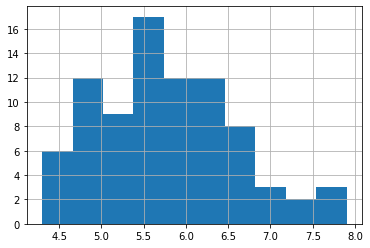

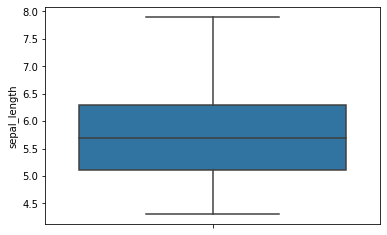

sepal_width
count    84.00000
mean      3.02619
std       0.41685
min       2.00000
25%       2.70000
50%       3.00000
75%       3.22500
max       4.20000
Name: sepal_width, dtype: float64


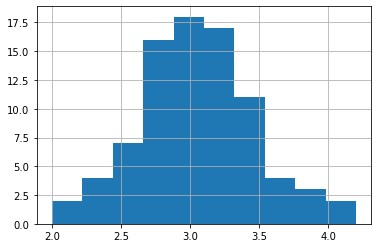

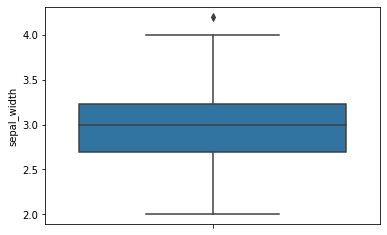

petal_length
count    84.000000
mean      3.670238
std       1.739947
min       1.000000
25%       1.500000
50%       4.150000
75%       5.100000
max       6.700000
Name: petal_length, dtype: float64


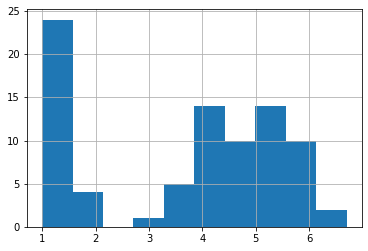

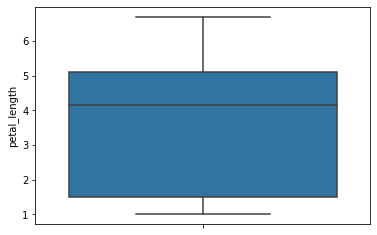

petal_width
count    84.000000
mean      1.159524
std       0.747384
min       0.100000
25%       0.200000
50%       1.300000
75%       1.800000
max       2.400000
Name: petal_width, dtype: float64


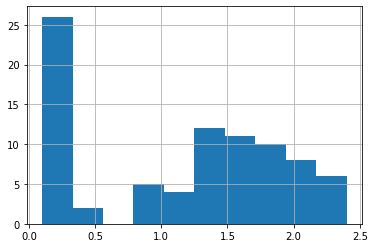

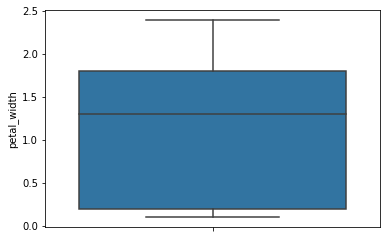

In [54]:
for col in num_vars:
    print(col)
    print(iris_train[col].describe())
    iris_train[col].hist()
    plt.show()
    sns.boxplot(y=col, data=iris_train)
    plt.show()

- For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

species
virginica     28
versicolor    28
setosa        28
Name: species, dtype: int64
virginica     33.333333
versicolor    33.333333
setosa        33.333333
Name: species, dtype: float64


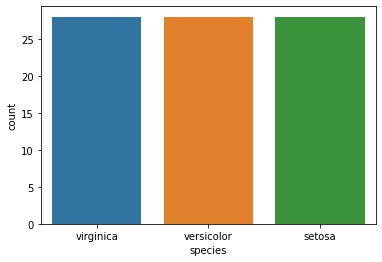

In [31]:
for col in cat_vars:
    print(col)
    print(iris_train[col].value_counts())
    print(iris_train[col].value_counts(normalize=True)*100)
    sns.countplot(x=col, data=iris_train)
    plt.show()

- Document takeaways & any actions.

label="Mean petal width", color='red', linestyle='dotted')
plt.xlabel('')

### 3. Bivariate Stats

- Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

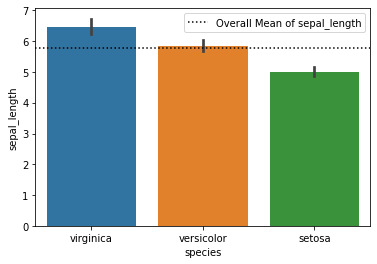

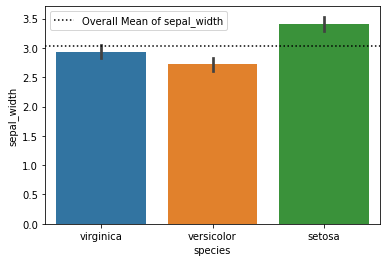

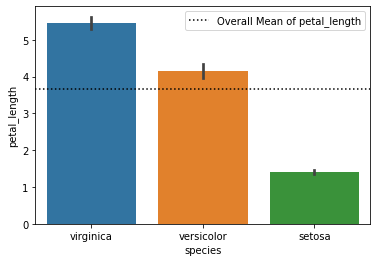

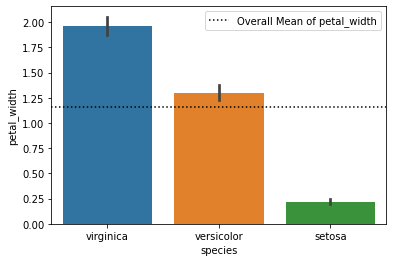

In [53]:
for col in num_vars:
    sns.barplot(x='species', y=col, data=iris_train)
    species_rate = iris_train[col].mean()
    plt.axhline(species_rate,  label = f'Overall Mean of {col}', linestyle='dotted', color='black')
    plt.legend()
    plt.show()

## Take aways
#### Highest mean
- Sepal length: Vir
- Sepal width: Set
- Petal length: Vir
- Petal width: Vir

***Virginica seems to have the largest petal and sepal size***

- For each measurement type, compute the descriptive statistics for each species.

In [48]:
iris_train.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  28.000000   28.000000  28.000000
             mean    5.010714    5.835714   6.464286
             std     0.381361    0.520124   0.678896
             min     4.300000    4.900000   4.900000
             25%     4.775000    5.575000   6.075000
             50%     5.000000    5.750000   6.400000
             75%     5.200000    6.050000   6.825000
             max     5.800000    6.900000   7.900000
sepal_width  count  28.000000   28.000000  28.000000
             mean    3.410714    2.732143   2.935714
             std     0.315453    0.306780   0.298408
             min     2.900000    2.000000   2.500000
             25%     3.175000    2.575000   2.700000
             50%     3.400000    2.750000   2.950000
             75%     3.600000    3.000000   3.100000
             max     4.200000    3.200000   3.800000
petal_length count  28.000000   28.000000  28.000000
             mean    1.414286    4.150000   5.446429
             std     0.160357    0.496282   0.496269
             min     1.000000    3.000000   4.500000
             25%     1.375000    3.900000   5.100000
             50%     1.400000    4.150000   5.450000
             75%     1.500000    4.500000   5.700000
             max     1.700000    5.100000   6.700000
petal_width  count  28.000000   28.000000  28.000000
             mean    0.217857    1.300000   1.960714
             std     0.072283    0.198139   0.258685
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.175000   1.800000
             50%     0.200000    1.300000   1.950000
             75%     0.200000    1.500000   2.100000
             max     0.400000    1.700000   2.400000
versicolor   count  28.000000   28.000000  28.000000
             mean    0.000000    1.000000   0.000000
             std     0.000000    0.000000   0.000000
             min     0.000000    1.000000   0.000000
             25%     0.000000    1.000000   0.000000
             50%     0.000000    1.000000   0.000000
             75%     0.000000    1.000000   0.000000
             max     0.000000    1.000000   0.000000
virginica    count  28.000000   28.000000  28.000000
             mean    0.000000    0.000000   1.000000
             std     0.000000    0.000000   0.000000
             min     0.000000    0.000000   1.000000
             25%     0.000000    0.000000   1.000000
             50%     0.000000    0.000000   1.000000
             75%     0.000000    0.000000   1.000000
             max     0.000000    0.000000   1.000000

- For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

- Document takeaways & any actions.

### 4. Multivariate Stats

- Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

- Visualize two numeric variables of the species. Hint: sns.relplot with hue or col

- Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

- Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

- Document takeaways and any actions.